In [217]:
import numpy as np
import math
import matplotlib.pyplot as plt

#for i in range(-360,360,10):
    #print (math.sin(math.radians(i)))

digital_signal= np.array(range(-360,370,10)) 
print (np.sin(digital_signal*180/math.pi))



[ 0.93797365  0.6720115  -0.43587518 -0.99767894 -0.30954818  0.76639768
  0.882168   -0.10727919 -0.96232246 -0.6117273   0.50526578  0.98924045
  0.2338527  -0.81451564 -0.84242421  0.18509202  0.98071711  0.54765818
 -0.57153017 -0.97468126 -0.15671031  0.85759397  0.79746812 -0.26175964
 -0.99304382 -0.48020055  0.63425834  0.95409147  0.07859831 -0.89536615
 -0.74757789  0.33680768  0.99922629  0.4097718  -0.6930622  -0.92759846
  0.          0.92759846  0.6930622  -0.4097718  -0.99922629 -0.33680768
  0.74757789  0.89536615 -0.07859831 -0.95409147 -0.63425834  0.48020055
  0.99304382  0.26175964 -0.79746812 -0.85759397  0.15671031  0.97468126
  0.57153017 -0.54765818 -0.98071711 -0.18509202  0.84242421  0.81451564
 -0.2338527  -0.98924045 -0.50526578  0.6117273   0.96232246  0.10727919
 -0.882168   -0.76639768  0.30954818  0.99767894  0.43587518 -0.6720115
 -0.93797365]


Discrete Time PID equations

In [218]:
# update = e_x[k] history = e_x[k-1]

data = 0
integration_history = 0
def FowardEuler(update,time_step):
    #integrate
    global integration_history
    integration_history = integration_history + update * time_step
    
    return integration_history

filter_history = 0
def LowPassFilter(update,alpha_gain):
    #low pass filter
    global filter_history
    filter_history = filter_history*alpha_gain + (1- alpha_gain) * update
    #output
    return filter_history

def BackwardEuler(update,alpha_gain,time_step):
    backup_history = filter_history
    return (LowPassFilter(update,alpha_gain)-backup_history)/time_step
    
    

FowardEuler(data,1) # integrator


0

Porportional controller

In [219]:
filter_history = 0
integration_history = 0


start_value = 100
set_point = 0

curr_value = start_value
#start iterations

iteration = 0
for i in range(0,100):
    curr_error =  set_point - curr_value
    curr_value = curr_value + .1*curr_error
    #print ("curr val",curr_value)
    print (curr_value)





90.0
81.0
72.9
65.61
59.049
53.1441
47.82969
43.046721
38.7420489
34.86784401
31.381059608999998
28.2429536481
25.41865828329
22.876792454961
20.589113209464898
18.53020188851841
16.67718169966657
15.009463529699913
13.50851717672992
12.157665459056929
10.941898913151237
9.847709021836113
8.862938119652503
7.976644307687252
7.178979876918527
6.461081889226675
5.814973700304007
5.233476330273606
4.710128697246246
4.239115827521621
3.815204244769459
3.4336838202925133
3.090315438263262
2.781283894436936
2.5031555049932424
2.252839954493918
2.027555959044526
1.8248003631400733
1.642320326826066
1.4780882941434594
1.3302794647291134
1.197251518256202
1.0775263664305819
0.9697737297875236
0.8727963568087713
0.7855167211278942
0.7069650490151047
0.6362685441135942
0.5726416897022348
0.5153775207320114
0.4638397686588102
0.4174557917929292
0.37571021261363624
0.3381391913522726
0.30432527221704536
0.27389274499534083
0.24650347049580673
0.22185312344622604
0.19966781110160342
0.17970102999144

PI controller

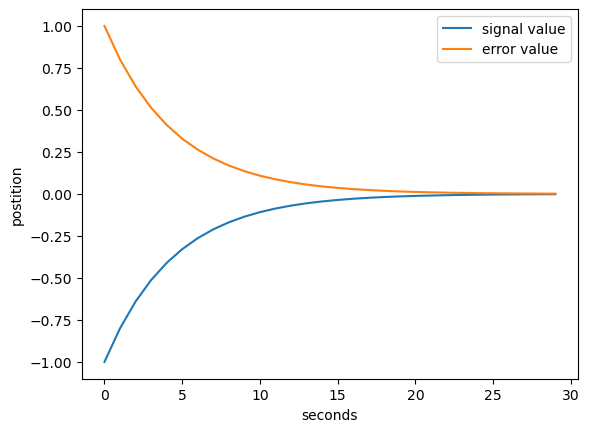

In [220]:
filter_history = 0
integration_history = 0


kp = .2
ki = .25

time_step = .001

start_value = -1
set_point = 0

curr_value = start_value

plot_out = list()
plot_out2 = list()

steps = 30
#start iterations
for i in range(0,steps):
    plot_out.append(curr_value)
    curr_error =  set_point - curr_value
    plot_out2.append(curr_error)

    curr_value = curr_value +curr_error * (kp  + ki*FowardEuler(curr_value,time_step))
    #print ("curr val",curr_value)
    
    #print (curr_value)

plt.plot(range(0,steps),plot_out,label="signal value")
plt.plot(range(0,steps),plot_out2,label = "error value")
plt.xlabel("seconds")
plt.ylabel("postition")
plt.legend()
plt.show()

pid

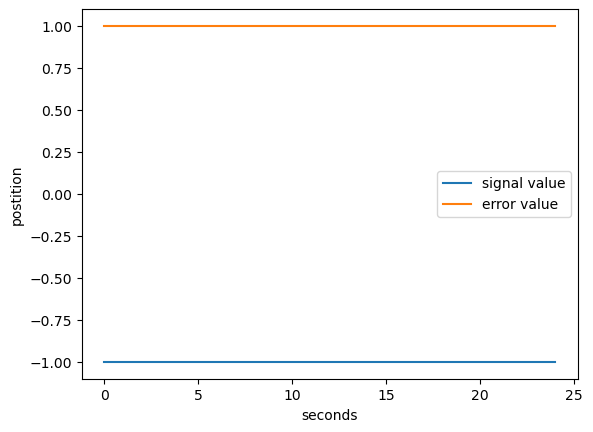

In [224]:
filter_history = 0
integration_history = 0


kp = 0
ki = 0
kd = 1
time_step = .001
measurement_gain = 1

start_value = -1
set_point = 0

curr_value = start_value

plot_out = list()
plot_out2 = list()

steps = 25
#start iterations
for i in range(0,steps):
    plot_out.append(curr_value)
    curr_error =  set_point - curr_value
    plot_out2.append(curr_error)

    curr_value = curr_value +curr_error * (kp  + ki*FowardEuler(curr_value,time_step)+ kd * BackwardEuler(curr_value,measurement_gain,time_step))
    #print ("curr val",curr_value)
    
    #print (curr_value)

plt.plot(range(0,steps),plot_out,label="signal value")
plt.plot(range(0,steps),plot_out2,label = "error value")
plt.xlabel("seconds")
plt.ylabel("postition")
plt.legend()
plt.show()